# Unit tests for re-usable Finance agents
The notebook contains unit tests for testing each of the individual agents.

### Note:
* Agent code have dependency on tools packages that MUST be deployed.
* Select model that support structured output
* You may use different models than one listed below
* All API keys MUST be provide in the key file : Adjust ```load_dotenv('PATH-to-your-key-file')``` in first cell

In [1]:
from dotenv import load_dotenv

from langchain_core.messages import HumanMessage
from langchain.chat_models import init_chat_model


# Agents
from stock_research_agent import create_stock_research_agent
from industry_research_agent import create_industry_research_agent
from stock_trend_analyst import create_stock_trend_analyst_agent



# CHANGE THIS TO POINT TO YOUR OWN FILE
# Load the file that contains the API keys 
load_dotenv('C:\\Users\\raj\\.jupyter\\.env')

models = [
            {"model":"gpt-4o-mini", "model_provider":"openai"},
            {"model":"claude-3-5-sonnet-latest", "model_provider":"anthropic"},
            {"model":"command-r",  "model_provider":"cohere"},
            {"model": "moonshotai/kimi-k2-instruct", "model_provider": "groq"},
            {"model": "llama-3.3-70b-versatile", "model_provider": "groq"}
    
]

USER_AGENT environment variable not set, consider setting it to identify your requests.


## 1. Stock news research agent

This agent needs a finance news search tool. We will use Yahoo Finance search for this. 


```pip install --upgrade --quiet  yfinance```

```uv add yfinance```

https://python.langchain.com/docs/integrations/tools/yahoo_finance_news/

https://algotrading101.com/learn/yahoo-finance-api-guide/

In [2]:
# !uv add yfinance

In [3]:
# Create the model - change index to switch models
chat_llm = init_chat_model(**models[0])


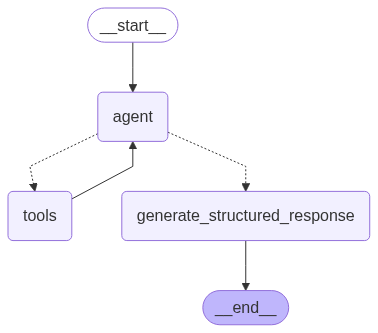

In [4]:
# chat_model, name = "stock-news-research-agent"
agent=create_stock_research_agent(
    chat_llm
)

agent

In [5]:

messages = {"messages":[HumanMessage(content="AAPL")]}
response  = agent.invoke(messages)

In [6]:
print(response["messages"][-1].content)

### Short Report on Apple Inc. (AAPL)

#### Recent News Summary
1. **Legal and Tariff Risks:**
   - Analysts from Evercore believe that Apple can weather legal and tariff challenges, maintaining a positive outlook with a target price of $250 per share. Despite a year-to-date decline of over 8%, the firm's confidence suggests potential for recovery as strategic uncertainties, particularly around AI, are resolved.

2. **AI Strategy and Earnings:**
   - Bank of America has reiterated its bullish stance on Apple, highlighting the company's involvement in artificial intelligence and a potential refresh cycle in the PC sector as critical growth drivers. This underscores optimism about Apple's earnings potential amid industry transitions towards AI.

#### Impact on Stock Price
The overall sentiment from analysts remains bullish toward Apple, which could stabilize or even positively influence the stock price in the near term. The acknowledgment of challenges, particularly around AI strategies,

In [7]:
print("Report\n","-------\n", response["structured_response"].report)
print("Confidence score\n","----------------\n",response["structured_response"].confidence_score)

Report
 -------
 Apple Inc. (AAPL) is currently facing challenges due to uncertainty surrounding its AI strategy and has seen a year-to-date decline of over 8%. However, analysts from Evercore and Bank of America remain bullish, setting a target price of $250, citing Apple's ability to navigate legal and tariff risks, as well as positive indicators from AI adoption and a forthcoming PC refresh cycle.
Confidence score
 ----------------
 0.75


## 2. Industry news research agent

This agent needs a web search tool. Refer to a list of LangChain search tools that you may use. This code shows the use of Tavily. The API key for Tavily (TAVILY_API_KEY) is already in the key file. 

```uv add langchain-tavily```

```%pip install -qU langchain-tavily```

[LangChain Tavily integration](https://python.langchain.com/docs/integrations/tools/tavily_search/)

[LangChain web search tools](https://python.langchain.com/docs/integrations/tools/#search)

This agent needs a web search tool. Refer to a list of LangChain search tools that you may use. This code shows the use of Tavily. The API key for Tavily (TAVILY_API_KEY) is already in the key file. 

In [8]:
# Create the model - change index to switch models
chat_llm = init_chat_model(**models[0])


In [9]:
# chat_model, name = "stock-news-research-agent"
industry_research_agent=create_industry_research_agent(
    chat_llm
)

In [10]:
messages = {"messages":[HumanMessage(content="AAPL")]}
response  = industry_research_agent.invoke(messages)

In [11]:
print(response["messages"][-1].content)

Apple Inc. (Ticker: AAPL) operates in the technology sector, primarily focusing on consumer electronics, software, and online services.

### Recent Developments Impacting AAPL
1. **Strong Financial Performance**: Apple reported its Q3 revenue, which surpassed market estimates by nearly $5 billion, driven by robust iPhone sales. This positive performance has led to a slight increase in the stock price during post-market trading ([Seeking Alpha](https://seekingalpha.com/news/4475886-apple-q3-revenue-crushes-estimates-by-nearly-5b-shares-edge-higher)).

2. **Market Outlook**: Analysts remain optimistic about Apple's future earnings potential. However, concerns exist regarding external factors like AI implementation and tariffs, which might hinder stock performance in the short term ([TipRanks](https://www.tipranks.com/news/dont-expect-apple-stock-aapl-to-pop-until-ai-and-tariff-uncertainty-ease-say-analysts)).

3. **Ongoing Legal Issues**: Apple is currently facing a lawsuit for fraud, wh

In [12]:
print("Report\n","-------\n", response["structured_response"].report)
print("Confidence score\n","----------------\n",response["structured_response"].confidence_score)

Report
 -------
 Apple Inc. (AAPL) is experiencing a positive momentum following its recent Q3 earnings report, which exceeded expectations significantly, primarily due to strong iPhone sales. However, there is cautious sentiment in the market due to ongoing legal issues and uncertainties regarding tariffs and AI implementation that may influence stock performance in the near future.
Confidence score
 ----------------
 0.7


## 3. Stock trend analyst agent


In [13]:
# Create the model - change index to switch models
chat_llm = init_chat_model(**models[0])

trends_agent = create_stock_trend_analyst_agent(chat_llm) 


In [14]:
messages = {"messages":[HumanMessage(content="AAPL")]}
response  = trends_agent.invoke(messages)

In [15]:
print(response["messages"][-1].content)

I have gathered the historical stock data for Apple Inc. (AAPL). Here are some key insights that can help predict the near future stock price trend:

1. **Recent Closing Prices**:
   - The closing prices for the last few days were:
     - August 15, 2025: $231.59
     - August 14, 2025: $232.78
     - August 13, 2025: $233.33
     - August 12, 2025: $229.65
     - August 11, 2025: $227.18

2. **Trend Analysis**:
   - The closing prices have shown slight fluctuations, with prices generally hovering around the $230 mark.
   - The most recent closing price on August 15 was lower than that on August 14 but higher than August 12, indicating a short-term trend of variability but not a significant downward trend.

3. **Volume Analysis**:
   - The trading volumes show moderate activity, which is a good indicator of liquidity.

Based on this brief analysis, the stock price for AAPL might experience slight fluctuations in the near future, but there is no strong indication of a dramatic increase 

In [16]:
print("Report\n","-------\n", response["structured_response"].analysis)
print("Confidence score\n","----------------\n",response["structured_response"].confidence_score)

Report
 -------
 Apple Inc. (AAPL) has shown resilience and a general upward trend over the long term, with recent fluctuations indicating a period of consolidation rather than a decline. Given its strong fundamentals, consistent financial performance, and brand loyalty, the outlook remains positive for continued growth in the mid to long term.
Confidence score
 ----------------
 0.8
